# <div> <center> Naive Bayes' Classifier </center> </div>
## <div> <center> Student Performance Analysis </center> </div>

### Student Credentials:
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Section: AID 3
- Group: 1
- E-mail: yousef.gomaa@ejust.edu.eg

In [1]:
# Libraries needed:
# Pre-processing:
# Pandas
import pandas as pd

# Data Visualization:
# Standard Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Machine Learning:
# Machine Learning Tools
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Naive Bayes' Gaussian
from sklearn.naive_bayes import GaussianNB

### Importing the Dataset into a Dataframe:

In [2]:
df = pd.read_csv("Student_Performance_Analysis - Sheet1.csv")

### Data Preprocessing:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### Conclusion:
- Data types are correctly casted.
- No missing values found in the data given.
- No duplicated records.

### Data Visualization:

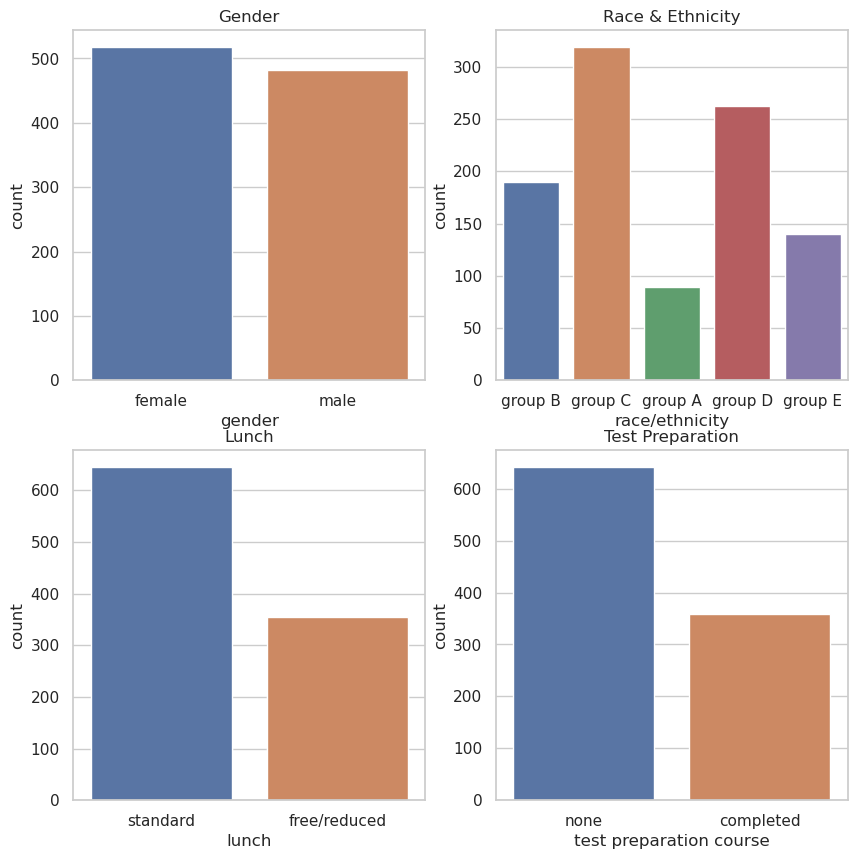

In [7]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(x='gender', data=df)
plt.title('Gender')
plt.subplot(2,2,2)
sns.countplot(x='race/ethnicity', data=df)
plt.title('Race & Ethnicity')
plt.subplot(2,2,3)
sns.countplot(x='parental level of education', data=df)
plt.title('Parental Level of Education')
plt.subplot(2,2,3)
sns.countplot(x='lunch', data=df)
plt.title('Lunch')
plt.subplot(2,2,4)
sns.countplot(x='test preparation course', data=df)
plt.title('Test Preparation')
plt.show()

#### Insights:
- Higher frequency of females than males in the dataset.
- Groups C and D dominate the dataset by a margain.
- Lunch is standard most of the time.
- Most of the records have not finished the test preparation course.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

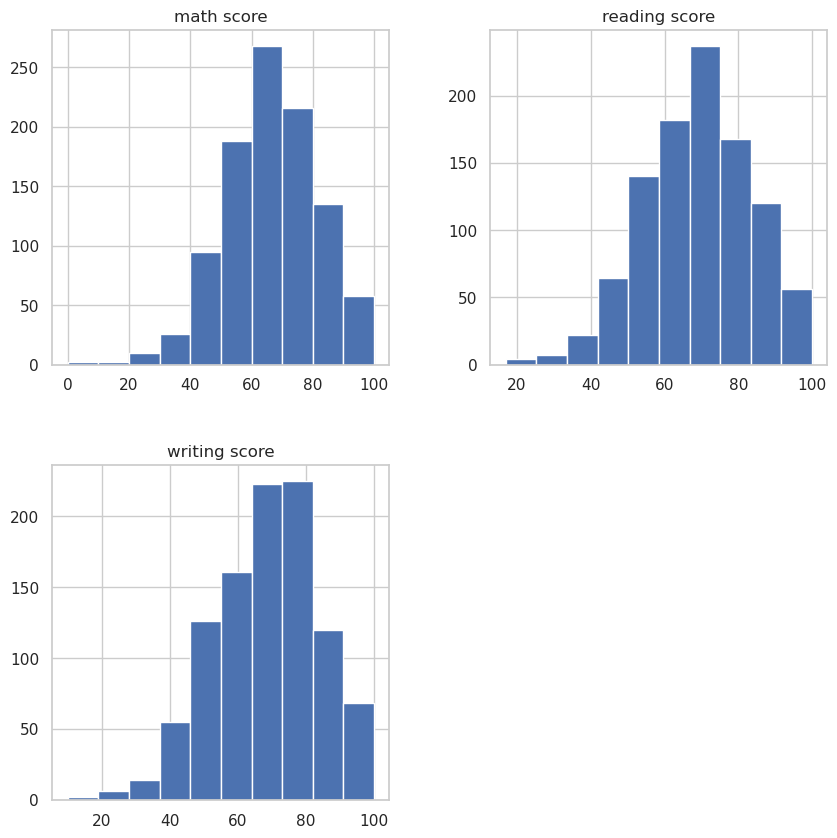

In [9]:
df.hist(figsize=(10,10))

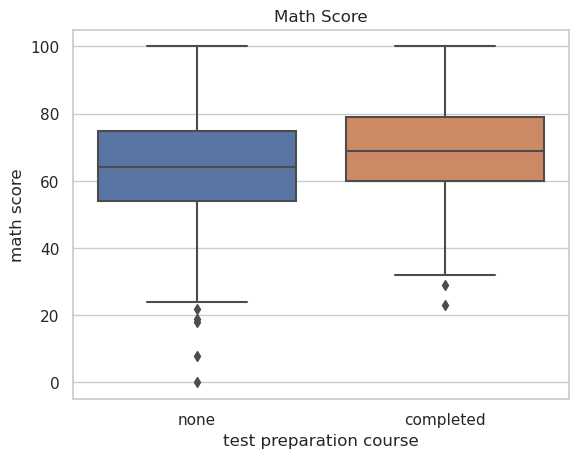

In [10]:
sns.boxplot(y='math score', x='test preparation course', data= df)
plt.title('Math Score')
plt.show()

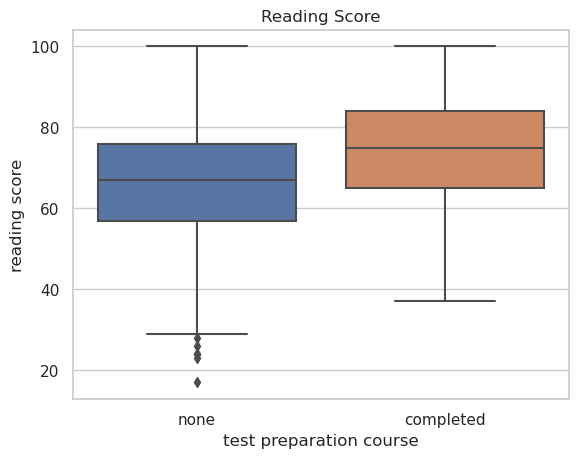

In [11]:
sns.boxplot(y='reading score', x='test preparation course', data= df)
plt.title('Reading Score')
plt.show()

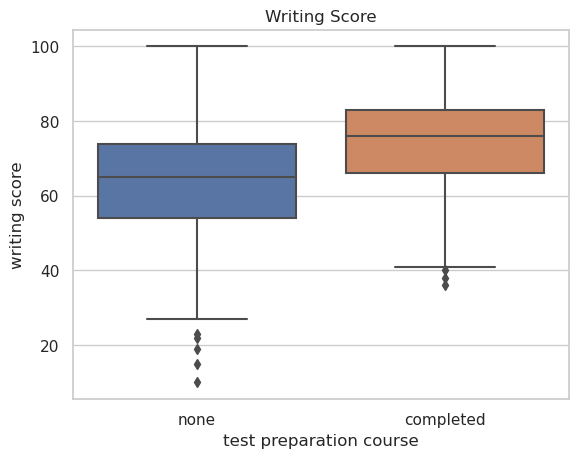

In [12]:
sns.boxplot(y='writing score', x='test preparation course', data= df)
plt.title('Writing Score')
plt.show()

<Axes: >

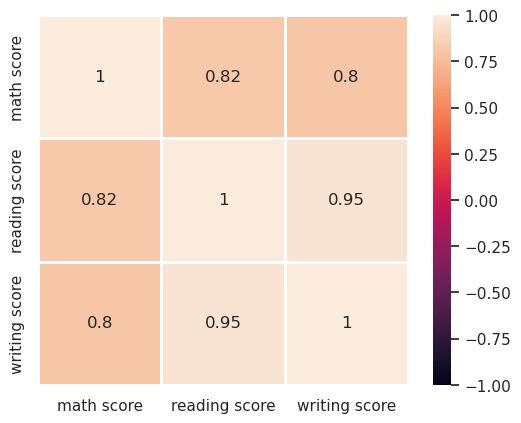

In [13]:
sns.heatmap(df.corr(numeric_only=True), linewidths=1, vmin=-1, vmax=1, annot=True, square=True)

- Numeric only! ^

In [14]:
df_num = df.copy()

In [15]:
# Converting/encoding data to numerical values to re-calculate correlation.
from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
obj = df_num.select_dtypes(include='object')
non_obj = df_num.select_dtypes(exclude='object')
for i in range (0, obj.shape[1]) :
    obj.iloc[:, i] = laben.fit_transform(obj.iloc[:, i])
df_num = pd.concat([obj, non_obj], axis = 1)
df_num

/tmp/ipykernel_110283/3754586768.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:, i] = laben.fit_transform(obj.iloc[:, i])
/tmp/ipykernel_110283/3754586768.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:, i] = laben.fit_transform(obj.iloc[:, i])
/tmp/ipykernel_110283/3754586768.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns ar

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


<Axes: >

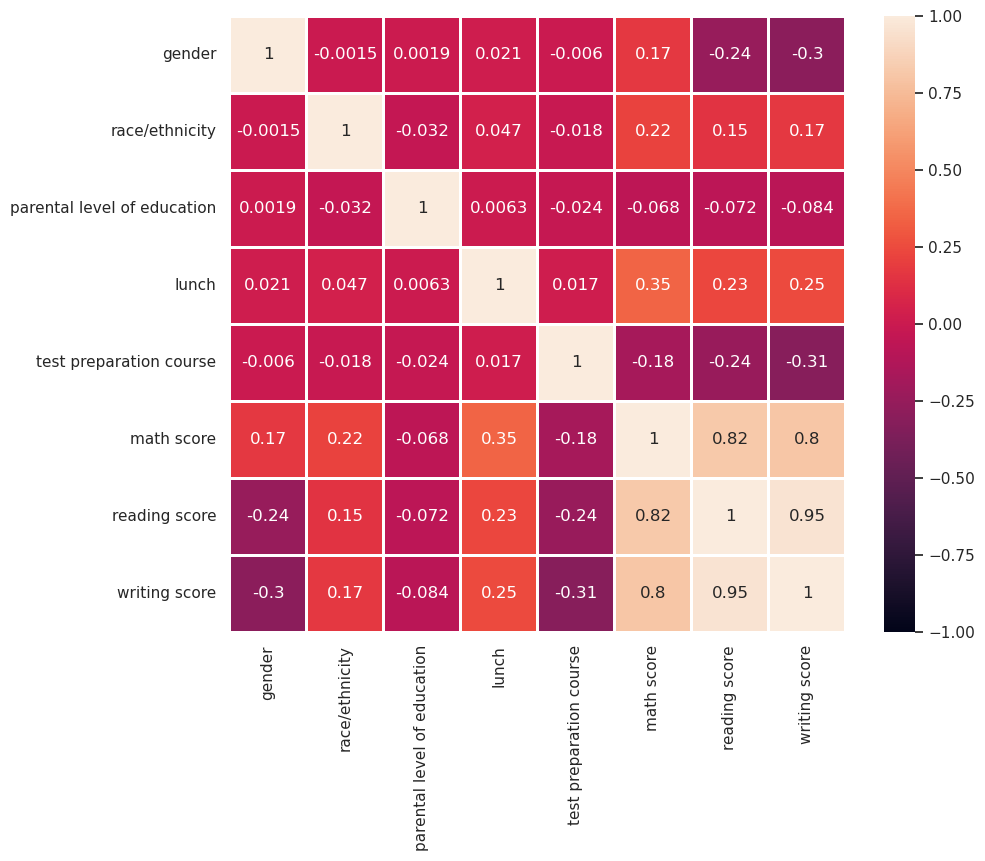

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(numeric_only=True), linewidths=1, vmin=-1, vmax=1, annot=True, square=True)

### Machine Learning:
#### Naive Bayes' Algorithm:
- predicting "Test Preparation Course" target.

#### Using standard python code:

In [17]:
counts = df['test preparation course'].value_counts()
prob = []
for i in range(len(counts)):
    prob.append(counts[i]/len(df))

columns = df.drop('test preparation course', axis=1)
columns

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95
996,male,group C,high school,free/reduced,62,55,55
997,female,group C,high school,free/reduced,59,71,65
998,female,group D,some college,standard,68,78,77


In [18]:
prob = {}

def func(col_n, col_item):
    completed = len(df[(df['test preparation course']=="completed")&(df[col_n]== col_item)])/counts[0]
    none = len(df[(df['test preparation course']=="none")&(df[col_n]== col_item)])/counts[1]
    return {str(col_n)+" | "+str(col_item)+" | completed": completed, str(col_n)+" | "+str(col_item)+" | none": none}

for i in columns:
    items = df[i].unique()
    for j in items:
        new_prob = func(i,j)
        prob.update(new_prob)

prob

{'gender | female | completed': 0.2866043613707165,
 'gender | female | none': 0.9329608938547486,
 'gender | male | completed': 0.27102803738317754,
 'gender | male | none': 0.8603351955307262,
 'race/ethnicity | group B | completed': 0.1059190031152648,
 'race/ethnicity | group B | none': 0.3407821229050279,
 'race/ethnicity | group C | completed': 0.1822429906542056,
 'race/ethnicity | group C | none': 0.5642458100558659,
 'race/ethnicity | group A | completed': 0.048286604361370715,
 'race/ethnicity | group A | none': 0.16201117318435754,
 'race/ethnicity | group D | completed': 0.1277258566978193,
 'race/ethnicity | group D | none': 0.5027932960893855,
 'race/ethnicity | group E | completed': 0.09345794392523364,
 'race/ethnicity | group E | none': 0.22346368715083798,
 "parental level of education | bachelor's degree | completed": 0.07165109034267912,
 "parental level of education | bachelor's degree | none": 0.2011173184357542,
 'parental level of education | some college | comp

#### Using the NB Gaussian module from "Scikit Learn" library:

In [19]:
# Using the numeric encoded dataframe
X = df_num.drop('test preparation course', axis=1)
Y = df_num['test preparation course']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [21]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [22]:
predictions = classifier.predict(x_test)

predictions[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

#### NB Gaussian Accuracy:

In [23]:
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, predictions)))

Accuracy Score:  0.67


#### Accuracy Report, Confusion Matrix:

In [24]:
df_cf = confusion_matrix(y_test, predictions)
df_cf

array([[ 67,  38],
       [ 61, 134]])

<Axes: >

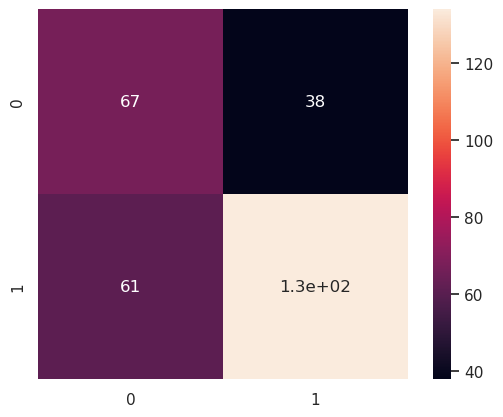

In [25]:
sns.heatmap(df_cf, annot=True, square=True)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, predictions)))
# Precision
precision = print('Precision Score: ', format(precision_score(y_test, predictions)))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, predictions)))
# F1-score
f1_score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, predictions)))

Accuracy Score:  0.67
Precision Score:  0.7790697674418605
Sensitivity/Recall Score:  0.6871794871794872
F1-Measure/F1-Score:  0.7302452316076294
